# Proyek Analisis Data : E-Commerce Public Dataset
- **Nama:** Siti A'isyah
- **Email:** siti76294@gmail.com
- **ID Dicoding:** sitiaisyahhh5

## Menentukan Pertanyaan Bisnis

1. Produk mana yang paling banyak terjual?
2. Berapa range jumlah installments yang paling sering dilakukan oleh pelanggan?
3. Negara bagian mana yang memiliki 5 jumlah penjual terbanyak?

## Menyiapkan Semua Library yang Digunakan

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [64]:
# Membuat Tabel Customers
customers_df = pd.read_csv("https://raw.githubusercontent.com/sitiaisyahh5/commerce/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [112]:
# Membuat Tabel Order Payments
orderpy_df = pd.read_csv("https://raw.githubusercontent.com/sitiaisyahh5/commerce/main/order_payments_dataset.csv")
orderpy_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [66]:
# Membuat Tabel Order Items
orderitems_df = pd.read_csv("https://raw.githubusercontent.com/sitiaisyahh5/commerce/main/order_items_dataset.csv")
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [67]:
# Membuat Tabel Order Reviews
orderrv_df = pd.read_csv("https://raw.githubusercontent.com/sitiaisyahh5/commerce/main/order_reviews_dataset.csv")
orderrv_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [68]:
# Membuat Tabel Orders
orders_df = pd.read_csv("https://raw.githubusercontent.com/sitiaisyahh5/commerce/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [69]:
# Membuat Tabel Product Category Name
productcn_df = pd.read_csv("https://raw.githubusercontent.com/sitiaisyahh5/commerce/main/product_category_name_translation.csv")
productcn_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [70]:
# Membuat Tabel Products
products_df = pd.read_csv("https://raw.githubusercontent.com/sitiaisyahh5/commerce/main/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [71]:
# Membuat Tabel Sellers
sellers_df = pd.read_csv("https://raw.githubusercontent.com/sitiaisyahh5/commerce/main/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

a. Memeriksa Tipe Data dan Missing Value

In [72]:
#Customers
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Pada tabel Customers tidak terdapat missing value dan tipe data pada setiap kolom sudah tepat.

In [73]:
# Order Payments
orderpy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Pada tabel Order Payments tidak terdapat missing value dan tipe data pada setiap kolom sudah tepat.

In [74]:
# Order Items
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada tabel Order Items tidak terdapat missing value. Akan tetapi, pada kolom shipping_limit_data terdapat masalah pada tipe datanya.

In [75]:
# Order Reviews
orderrv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Pada tabel Order Review terdapat missing value pada kolom review_comment_title dan review_comment_message. Selain itu, terdapat kesalahan pada tipe data review_creation_date dan review_answer_timestamp.

In [76]:
# Orders 
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Pada tabel Orders terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Selain itu order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.

In [77]:
# Product Category Name
productcn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Pada tabel Product Category Name tidak terdapat missing value dan tipe data pada setiap kolom sudah tepat.

In [78]:
# Products
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Pada tabel Products terdapat missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm. Tidak terdapat masalah tipe data pada tabel Products.

In [79]:
# Sellers
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Pada tabel Sellers tidak terdapat missing value dan tipe data pada setiap kolom sudah tepat.

b. Memeriksa Duplikasi Data

In [80]:
print("Jumlah duplikasi pada Tabel Customers: ",customers_df.duplicated().sum())
print("Jumlah duplikasi pada Tabel Order Payments: ",orderpy_df.duplicated().sum())
print("Jumlah duplikasi pada Tabel Order Items: ",orderitems_df.duplicated().sum())
print("Jumlah duplikasi pada Tabel Order Reviews: ",orderrv_df.duplicated().sum())
print("Jumlah duplikasi pada Tabel Orders: ",orders_df.duplicated().sum())
print("Jumlah duplikasi pada Tabel Product Category Name: ",productcn_df.duplicated().sum())
print("Jumlah duplikasi pada Tabel Products: ",products_df.duplicated().sum())
print("Jumlah duplikasi pada Tabel Sellers: ",sellers_df.duplicated().sum())

Jumlah duplikasi pada Tabel Customers:  0
Jumlah duplikasi pada Tabel Order Payments:  0
Jumlah duplikasi pada Tabel Order Items:  0


Jumlah duplikasi pada Tabel Order Reviews:  0
Jumlah duplikasi pada Tabel Orders:  0
Jumlah duplikasi pada Tabel Product Category Name:  0
Jumlah duplikasi pada Tabel Products:  0
Jumlah duplikasi pada Tabel Sellers:  0


### Cleaning Data

a. Menangangi Missing Value

In [81]:
# Menghapus kolom Review Comment Title pada Tabel Order Reviews
orderrv_df[orderrv_df.review_comment_title.isna()]
orderrv_df.drop(columns= 'review_comment_title', inplace=True)

In [82]:
print(orderrv_df)

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score                             review_comment_message  \
0

In [83]:
# Menghapus kolom Review Comment Message pada Tabel Order Reviews
orderrv_df[orderrv_df.review_comment_message.isna()]
orderrv_df.drop(columns= 'review_comment_message', inplace=True)

In [84]:
print(orderrv_df)

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_creation_date review_answer_timestamp  
0       

In [85]:
# Menghapus Kolom Order_approved_at, Order_delivered_carrier_data, dan Order_delivered_customer_data pada Tabel Orders
orders_df[orders_df.order_approved_at.isna()]
orders_df.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [86]:
print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp order_estimated_delivery_date  

In [116]:
# Mengisi Kolom Product Category Name dengan Menggunakan Modus pada Tabel Products
products_df.product_category_name.fillna(value=products_df.product_category_name.mode(), inplace=True)

# Mengisi Kolom Product Name Lenght dengan Menggunakan Modus pada Tabel Products
products_df.product_name_lenght.fillna(value=products_df.product_name_lenght.mode(), inplace=True)

# Mengisi Kolom Product Description Lenght dengan Menggunakan Modus pada Tabel Products
products_df.product_description_lenght.fillna(value=products_df.product_description_lenght.mode(), inplace=True)

# Mengisi Kolom Product Photo Qty dengan Menggunakan Modus pada Tabel Products
products_df.product_photos_qty.fillna(value=products_df.product_photos_qty.mode(), inplace=True)

# Mengisi Kolom Product Weight g dengan Menggunakan Modus pada Tabel Products
products_df.product_weight_g.fillna(value=products_df.product_weight_g.mode(), inplace=True)

# Mengisi Kolom Product Length cm dengan Menggunakan Modus pada Tabel Products
products_df.product_length_cm.fillna(value=products_df.product_length_cm.mode(), inplace=True)

# Mengisi Kolom Product Height cm dengan Menggunakan Modus pada Tabel Products
products_df.product_height_cm.fillna(value=products_df.product_height_cm.mode(), inplace=True)

# Mengisi Kolom Product Width cm dengan Menggunakan Modus pada Tabel Products
products_df.product_width_cm.fillna(value=products_df.product_width_cm.mode(), inplace=True)

C:\Users\PRIVACY\AppData\Local\Temp\ipykernel_1236\1210638847.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_name_lenght.fillna(value=products_df.product_name_lenght.mode(), inplace=True)
C:\Users\PRIVACY\AppData\Local\Temp\ipykernel_1236\1210638847.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [117]:
print(products_df)

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product

b. Mengganti Tipe Data

In [89]:
# Mengganti Tipe Data shipping_limit_date pada Tabel Order Items
datetime_sld = ["shipping_limit_date"]
for column in datetime_sld:
    orderitems_df[column] = pd.to_datetime(orderitems_df[column])

# Mengganti Tipe Data review_creation_date dan review_answer_timestamp pada Tabel Order Reviews
datetime_rcd_rat = ["review_creation_date","review_answer_timestamp"]
for column in datetime_rcd_rat:
    orderrv_df[column] = pd.to_datetime(orderrv_df[column])

## Exploratory Data Analysis (EDA)

### 1. Explore Customers

In [90]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [91]:
customers_df.customer_id.is_unique

True

### 2. Explore Orders

In [92]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
count,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2017-12-20 00:00:00
freq,1,1,96478,3,522


In [93]:
orders_df.order_id.is_unique

True

### 3. Explore Order Payments

In [94]:
orderpy_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [95]:
orderpy_df.order_id.is_unique

False

In [96]:
orderpy_df.order_id.duplicated

<bound method Series.duplicated of 0         b81ef226f3fe1789b1e8b2acac839d17
1         a9810da82917af2d9aefd1278f1dcfa0
2         25e8ea4e93396b6fa0d3dd708e76c1bd
3         ba78997921bbcdc1373bb41e913ab953
4         42fdf880ba16b47b59251dd489d4441a
                        ...               
103881    0406037ad97740d563a178ecc7a2075c
103882    7b905861d7c825891d6347454ea7863f
103883    32609bbb3dd69b3c066a6860554a77bf
103884    b8b61059626efa996a60be9bb9320e10
103885    28bbae6599b09d39ca406b747b6632b1
Name: order_id, Length: 103886, dtype: object>

### 4. Explore Customers dan Orders

In [97]:
co_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
co_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-15 00:00:00


### 5. Explore Customers Orders dan Order Payments

In [98]:
coopy_df = pd.merge(
    left=co_df,
    right=orderpy_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
coopy_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25


### 6. Explore Product

In [99]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [100]:
products_df.product_id.is_unique

True

### 7. Explore Order Items

In [101]:
orderitems_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [102]:
orderitems_df.product_id.is_unique

False

In [103]:
orderitems_df.product_id.duplicated

<bound method Series.duplicated of 0         4244733e06e7ecb4970a6e2683c13e61
1         e5f2d52b802189ee658865ca93d83a8f
2         c777355d18b72b67abbeef9df44fd0fd
3         7634da152a4610f1595efa32f14722fc
4         ac6c3623068f30de03045865e4e10089
                        ...               
112645    4aa6014eceb682077f9dc4bffebc05b0
112646    32e07fd915822b0765e448c4dd74c828
112647    72a30483855e2eafc67aee5dc2560482
112648    9c422a519119dcad7575db5af1ba540e
112649    350688d9dc1e75ff97be326363655e01
Name: product_id, Length: 112650, dtype: object>

### 8. Explore Product dan Order Items

In [104]:
poi_df = pd.merge(
    left=products_df,
    right=orderitems_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
poi_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


### 9. Explore All Data

In [105]:
all_data = pd.merge(
    left=coopy_df,
    right=poi_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05 00:00:00,1.0,...,1.0,8683.0,54.0,64.0,31.0,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-02-06 00:00:00,1.0,...,3.0,10150.0,89.0,15.0,40.0,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13 00:00:00,1.0,...,1.0,8267.0,52.0,52.0,17.0,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10 00:00:00,1.0,...,1.0,12160.0,56.0,51.0,28.0,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-15 00:00:00,1.0,...,1.0,5200.0,45.0,15.0,35.0,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [106]:
all_data.groupby(by=["customer_state"]).agg({
    "payment_value": "sum",
}).sort_values(by="payment_value", ascending=False)

,payment_value
customer_state,
SP,7673188.55
RJ,2783724.26
MG,2341861.47
RS,1152019.17
PR,1074614.19
BA,802416.72
SC,799135.92
GO,516182.51
DF,434512.55


In [107]:
all_data.groupby(by=["customer_city", "product_category_name"]).agg({
    "order_item_id": "sum",
}).sort_values(by="order_item_id", ascending=False)

order_item_id
customer_city product_category_name                
sao paulo     cama_mesa_banho                2698.0
              beleza_saude                   2323.0
              moveis_decoracao               1876.0
              utilidades_domesticas          1870.0
              informatica_acessorios         1786.0
...                                             ...
itapagipe     moveis_decoracao                  1.0
itapaje       pcs                               1.0
              relogios_presentes                1.0
itaparica     pet_shop                          1.0
zortea        informatica_acessorios            1.0

[25221 rows x 1 columns]

In [121]:
# Convert Tabel Product
products_df.to_csv('products2_df.csv', index=False)

In [122]:
# Convert Tabel Order Payments
orderpy_df.to_csv('orderpy2_df.csv', index=False)

In [123]:
# Convert Tabel Sellers
sellers_df.to_csv('sellers2_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk mana yang paling banyak terjual?

In [128]:
sum_product_df = products_df.groupby("product_category_name")["product_id"].count().reset_index()
sum_product_df = sum_product_df.rename(columns={"product_id": "products"})
sum_product_df = sum_product_df.sort_values(by="products", ascending=False)
sum_product_df = sum_product_df.head(10)

sum_product_df.head()

,product_category_name,products
13,cama_mesa_banho,3029
32,esporte_lazer,2867
54,moveis_decoracao,2657
11,beleza_saude,2444
72,utilidades_domesticas,2335


C:\Users\PRIVACY\AppData\Local\Temp\ipykernel_1236\2654837545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\PRIVACY\AppData\Local\Temp\ipykernel_1236\2654837545.py:4: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


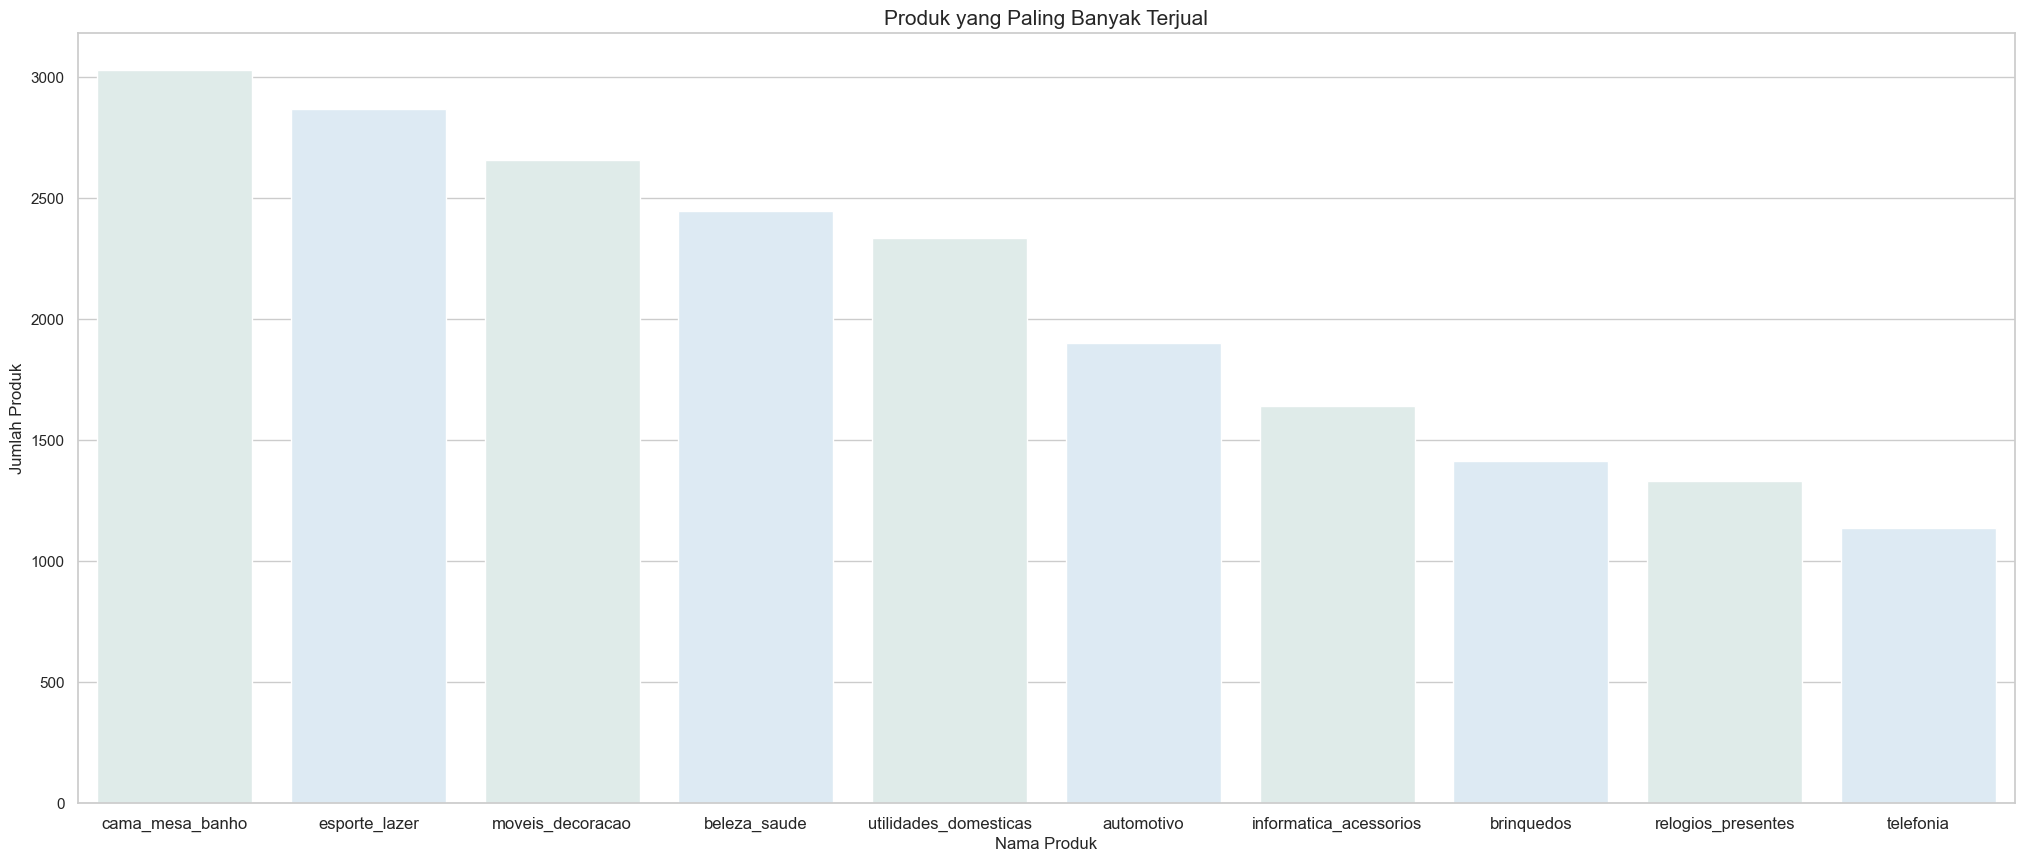

In [115]:
plt.figure(figsize=(25, 10))

colors = ["#ddedea", "#daeaf6"]
sns.barplot(
    y="products", 
    x="product_category_name",
    data=sum_product_df.sort_values(by="products", ascending=False),
    palette=colors
)
plt.title("Produk yang Paling Banyak Terjual", loc="center", fontsize=15)
plt.ylabel("Jumlah Produk")
plt.xlabel("Nama Produk")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Berapa range jumlah installments yang paling sering dilakukan oleh pelanggan?

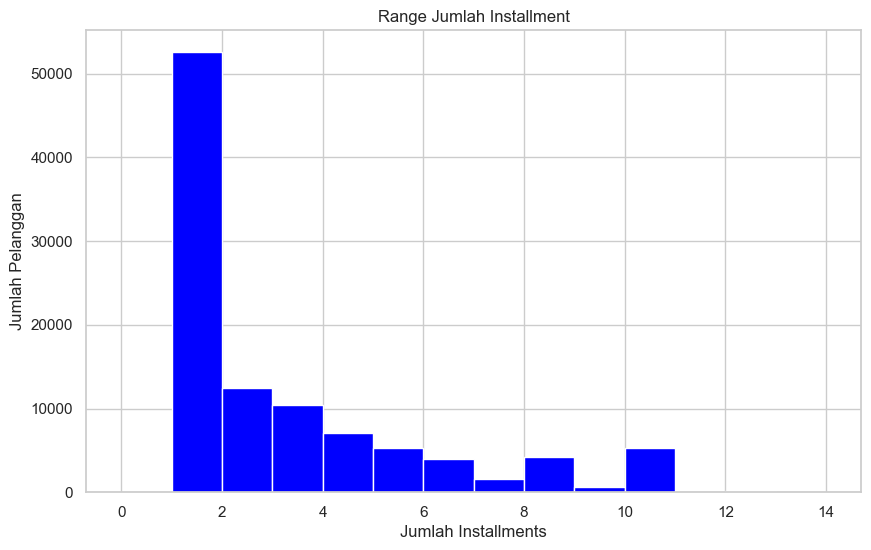

In [110]:
installments_payment = orderpy_df['payment_installments'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(orderpy_df['payment_installments'], bins=range(0, 15), color='blue', edgecolor='white')
plt.title('Range Jumlah Installment')
plt.xlabel('Jumlah Installments')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()

### Pertanyaan 3: Negara bagian mana yang memiliki 5 jumlah penjual terbanyak?

In [129]:
sum_seller_df = sellers_df.groupby("seller_state")["seller_id"].count().reset_index()
sum_seller_df = sum_seller_df.rename(columns={"seller_id": "sellers"})
sum_seller_df = sum_seller_df.sort_values(by="sellers", ascending=False)
sum_seller_df = sum_seller_df.head(10)

sum_seller_df.head()

,seller_state,sellers
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171


C:\Users\PRIVACY\AppData\Local\Temp\ipykernel_1236\3965853566.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_seller_states.index,


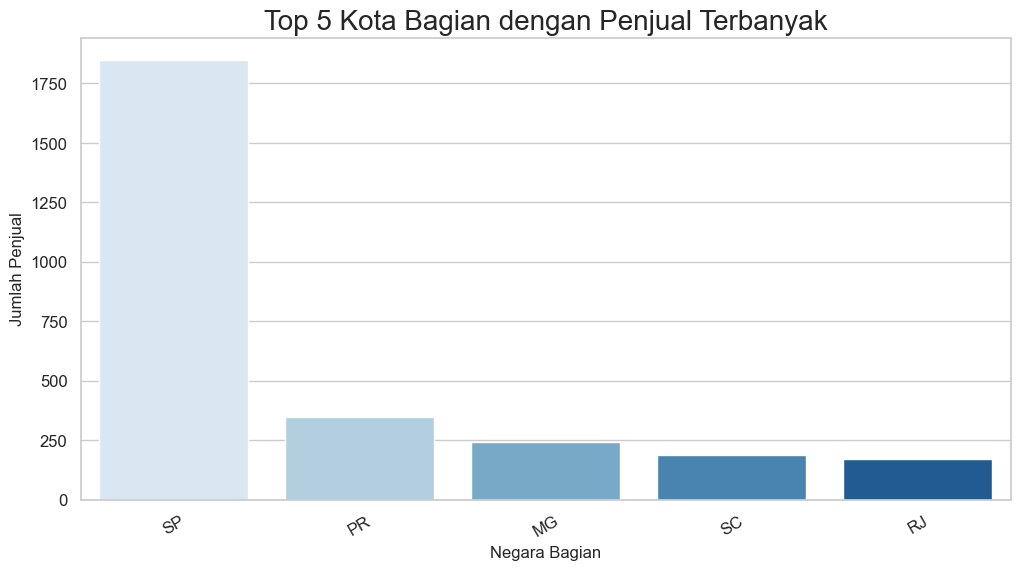

In [111]:
seller_states = sellers_df['seller_state'].value_counts().sort_values(ascending=False)

top_5_seller_states = seller_states.head(5)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_seller_states.index, 
            y=top_5_seller_states.values, 
            palette="Blues"  
           )

plt.title("Top 5 Kota Bagian dengan Penjual Terbanyak", fontsize=20)
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Penjual")
plt.xticks(fontsize=12, rotation=30)  
plt.yticks(fontsize=12)
plt.show()

## Conclusion

- Produk mana yang paling banyak terjual?

Berdasarkan grafik hasil visualisasi, terlihat bahwa produk Cama Mesa Banho yang terjual 3029 produk dilanjutkan oleh produk Beleza Saude yang terjual 2867 produk dan lain-lain. Sehingga dapat disimpulkan bahwa produk yang paling banyak terjual adalah Cama Mesa Banho.

- Berapa range jumlah installments yang paling sering dilakukan oleh pelanggan?

Berdasarkan grafik hasil visualisasi, terlihat bahwa range jumlah installment yang paling sering dilakukan oleh pelanggan adalah 1-2 kali berarti pelanggan sering melakukan installment sebanyak 1 kali dengan pembayarannya secara cash sampai 2 kali dengan pembayarannya secara menyicil.

- Negara bagian mana yang memiliki 5 jumlah penjual terbanyak?

Berdasarkan hasil visualisasi grafik, terlihat bahwa 5 negara yang memiliki jumlah penjual terbanyak yaitu negara bagian SP (Sao Paolo) sebanyak 1849 penjual. Kemudian negara bagian PR (Puerto Riko) sebanyak 349 penjual, disusul oleh negara bagian MG (Minas Gerais) sebanyak 244 penjual. Selanjutnya negara bagian SC (South Carolina) sebanyak 190 penjual, disusul negara bagian RJ (Rio de Janeiro) sebanyak 171 penjual. 